In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import statsmodels.api as sm
import glob
from functools import reduce
import numpy as np
from scipy import stats

In [5]:
# Load the dataset from severals files.

#Home PC data classpath
"""
surveyV1_df = pd.read_csv("D:/ExportFile/TVSEP2022SurveyV1.csv", low_memory=False)
shocks_df = pd.read_csv("D:/ExportFile/shocks.csv",low_memory=False)
shocks_details_df = pd.read_csv("D:/ExportFile/shocks_detail.csv",low_memory=False)
"""
#BSRU PC classpath
surveyV1_df = pd.read_csv("E:/ExportFiles/TVSEP2022SurveyV1.csv", low_memory=False)
shocks_df = pd.read_csv("E:/ExportFiles/shocks.csv",low_memory=False)
shocks_details_df = pd.read_csv("E:/ExportFiles/shocks_detail.csv",low_memory=False)

surveyV1Col = list(surveyV1_df.columns)
shocksCol = list(shocks_df.columns)
shocksDeCol = list(shocks_details_df.columns)



#data = data[shockRelated]

In [6]:
shocks_details_df.head()

,Unnamed: 0,interview__key,interview__id,shocks__id,shocks_detail__id,v31102d,v31102a__0,v31102a__1,v31102a__2,v31102a__3,...,shockdate,corryear,v31127__0,v31127__1,v31127__2,v31127__3,v31127__4,v31127__5,v31127__98,specify_v31127
0,0,61-84-00-54,e4caefaf3c074773a6e478861d18f0a7,2,0,Yes,NaN,NaN,NaN,NaN,...,2022-01-01T00:00:00,2022.0,0,0,0,0,1,0,0,NaN
1,1,61-84-00-54,e4caefaf3c074773a6e478861d18f0a7,3,0,Yes,NaN,NaN,NaN,NaN,...,2020-01-01T00:00:00,2020.0,1,0,0,0,0,0,0,NaN
2,2,59-46-95-71,419de10d4606492390aaec2a7fb1e5b9,10,0,Yes,NaN,NaN,NaN,NaN,...,2020-08-01T00:00:00,2020.0,0,0,0,1,1,0,0,NaN
3,3,16-60-25-95,22b3b9365e3246b3821baad080732b6b,62,0,Yes,NaN,NaN,NaN,NaN,...,2021-07-01T00:00:00,2021.0,1,0,0,0,0,0,0,NaN
4,4,36-89-97-65,782b881d3751484d8cbdf49f3daae2ac,1,0,Yes,NaN,NaN,NaN,NaN,...,2021-04-01T00:00:00,2021.0,1,0,0,0,0,0,0,NaN


In [7]:
descriptive_stats = shocks_details_df['v31102d'].describe()
print(descriptive_stats)

count     2177
unique       2
top        Yes
freq      1334
Name: v31102d, dtype: object


In [8]:
# Display basic information about the dataset
print("\nDataset Info:")
print(shocks_df.info())

# Display the first few rows of the dataset
print("\nFirst few rows:")
print(shocks_df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2067 non-null   int64  
 1   interview__key     2067 non-null   object 
 2   interview__id      2067 non-null   object 
 3   shocks__id         2067 non-null   object 
 4   v31102b            2067 non-null   int64  
 5   typeshock          2067 non-null   object 
 6   typeshocknum       2067 non-null   float64
 7   shockdisinv        676 non-null    float64
 8   savusedshock       676 non-null    float64
 9   insusedshock       676 non-null    float64
 10  pubtransusedshock  676 non-null    float64
 11  borrusedshock      2067 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 193.9+ KB
None

First few rows:
   Unnamed: 0 interview__key                     interview__id  \
0           0    61-84-00-54  e4caefaf3c074773a6e47886

In [9]:
shocks_df.head()

,Unnamed: 0,interview__key,interview__id,shocks__id,v31102b,typeshock,typeshocknum,shockdisinv,savusedshock,insusedshock,pubtransusedshock,borrusedshock
0,0,61-84-00-54,e4caefaf3c074773a6e478861d18f0a7,Death of household member,1,Death of household member,2.0,0.0,1.0,0.0,0.0,1
1,1,61-84-00-54,e4caefaf3c074773a6e478861d18f0a7,Household member left the household,1,Household member left the household,3.0,NaN,NaN,NaN,NaN,0
2,2,59-46-95-71,419de10d4606492390aaec2a7fb1e5b9,Flooding of agricultural land,1,Flooding of agricultural land,10.0,0.0,1.0,0.0,0.0,0
3,3,16-60-25-95,22b3b9365e3246b3821baad080732b6b,Job loss,1,Job loss,62.0,0.0,0.0,0.0,1.0,0
4,4,36-89-97-65,782b881d3751484d8cbdf49f3daae2ac,Illness of household member,1,Illness of household member,1.0,NaN,NaN,NaN,NaN,0


In [10]:
#Data cleaning and missing value replacement.

# Check for missing values
print("\nMissing values before cleaning:")
print(shocks_df.isnull().sum())

# Fill missing numerical values with 0
numeric_columns = ['shockdisinv', 'savusedshock', 'insusedshock', 'pubtransusedshock', 'borrusedshock']
shocks_df[numeric_columns] = shocks_df[numeric_columns].fillna(0)

# Verify that missing values are handled
print("\nMissing values after cleaning:")
print(shocks_df.isnull().sum())


Missing values before cleaning:
Unnamed: 0              0
interview__key          0
interview__id           0
shocks__id              0
v31102b                 0
typeshock               0
typeshocknum            0
shockdisinv          1391
savusedshock         1391
insusedshock         1391
pubtransusedshock    1391
borrusedshock           0
dtype: int64

Missing values after cleaning:
Unnamed: 0           0
interview__key       0
interview__id        0
shocks__id           0
v31102b              0
typeshock            0
typeshocknum         0
shockdisinv          0
savusedshock         0
insusedshock         0
pubtransusedshock    0
borrusedshock        0
dtype: int64


In [11]:
#Data exploration.

# Display basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
print(shocks_df[numeric_columns].describe())

# Calculate and display frequency of shock types
print("\nFrequency of shock types:")
shock_counts = shocks_df['typeshock'].value_counts()
print(shock_counts.head())


Basic statistics for numerical columns:
       shockdisinv  savusedshock  insusedshock  pubtransusedshock  \
count  2067.000000   2067.000000   2067.000000        2067.000000   
mean      0.010160      0.136913      0.015481           0.144170   
std       0.100306      0.390009      0.131092           0.391733   
min       0.000000      0.000000      0.000000           0.000000   
25%       0.000000      0.000000      0.000000           0.000000   
50%       0.000000      0.000000      0.000000           0.000000   
75%       0.000000      0.000000      0.000000           0.000000   
max       1.000000      3.000000      2.000000           3.000000   

       borrusedshock  
count    2067.000000  
mean        0.023706  
std         0.152168  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

Frequency of shock types:
typeshock
Drought                                 292
ภัยแล้ง                                 153
Flood

C:\Users\kitti\AppData\Local\Temp\ipykernel_8388\4007374038.py:18: UserWarning: Glyph 3616 (\N{THAI CHARACTER PHO SAMPHAO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kitti\AppData\Local\Temp\ipykernel_8388\4007374038.py:18: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kitti\AppData\Local\Temp\ipykernel_8388\4007374038.py:18: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kitti\AppData\Local\Temp\ipykernel_8388\4007374038.py:18: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kitti\AppData\Local\Temp\ipykernel_8388\4007374038.py:18: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kitti\AppData\Local\Temp\ipykernel_8388\4007374038.py:18: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO

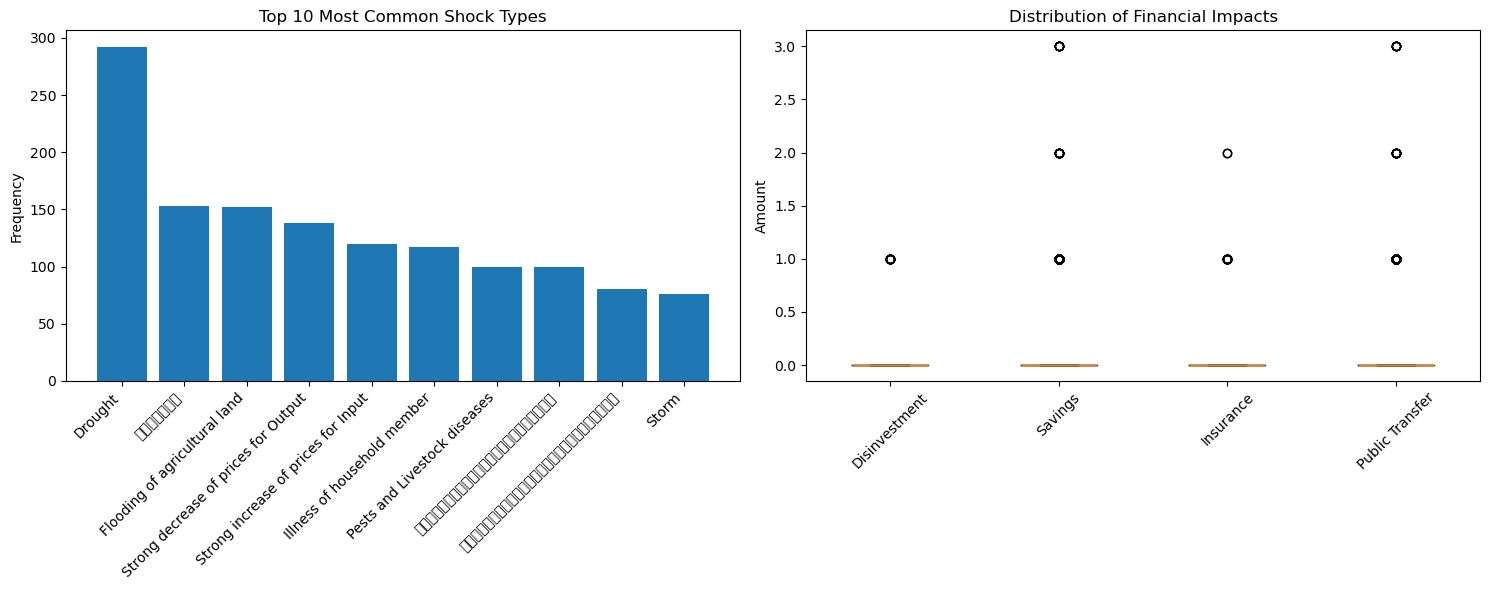

In [18]:
# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Plot 1: Bar chart of shock types
plt.subplot(1, 2, 1)
plt.bar(range(10), shock_counts.head(10).values)
plt.xticks(range(10), shock_counts.head(10).index, rotation=45, ha='right')
plt.title('Top 10 Most Common Shock Types')
plt.ylabel('Frequency')

# Plot 2: Box plot of financial impacts
plt.subplot(1, 2, 2)
bp = plt.boxplot([shocks_df[col].dropna() for col in ['shockdisinv', 'savusedshock', 'insusedshock', 'pubtransusedshock']])
plt.xticks(range(1, 5), ['Disinvestment', 'Savings', 'Insurance', 'Public Transfer'], rotation=45)
plt.title('Distribution of Financial Impacts')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

In [19]:
# Compare financial impact (shockdisinv) between two most common shock types
top_2_shocks = shock_counts.head(2).index
shock1_data = shocks_df[shocks_df['typeshock'] == top_2_shocks[0]]['shockdisinv']
shock2_data = shocks_df[shocks_df['typeshock'] == top_2_shocks[1]]['shockdisinv']

t_stat, p_val = stats.ttest_ind(shock1_data, shock2_data, nan_policy='omit')
print(f"\nT-test comparing financial impact between {top_2_shocks[0]} and {top_2_shocks[1]}:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")


T-test comparing financial impact between Drought and ภัยแล้ง:
t-statistic: 0.3960
p-value: 0.6923


In [20]:
summary = {
    'Total Records': len(shocks_df),
    'Number of Unique Shock Types': shocks_df['typeshock'].nunique(),
    'Most Common Shock': shock_counts.index[0],
    'Average Financial Impact': shocks_df['shockdisinv'].mean(),
    'Total Financial Impact': shocks_df['shockdisinv'].sum()
}

for key, value in summary.items():
    print(f"{key}: {value}")

Total Records: 2067
Number of Unique Shock Types: 38
Most Common Shock: Drought
Average Financial Impact: 0.010159651669085631
Total Financial Impact: 21.0


In [21]:
print(shocksCol)

['Unnamed: 0', 'interview__key', 'interview__id', 'shocks__id', 'v31102b', 'typeshock', 'typeshocknum', 'shockdisinv', 'savusedshock', 'insusedshock', 'pubtransusedshock', 'borrusedshock']


In [22]:
shocks_df.head()

,Unnamed: 0,interview__key,interview__id,shocks__id,v31102b,typeshock,typeshocknum,shockdisinv,savusedshock,insusedshock,pubtransusedshock,borrusedshock
0,0,61-84-00-54,e4caefaf3c074773a6e478861d18f0a7,Death of household member,1,Death of household member,2.0,0.0,1.0,0.0,0.0,1
1,1,61-84-00-54,e4caefaf3c074773a6e478861d18f0a7,Household member left the household,1,Household member left the household,3.0,0.0,0.0,0.0,0.0,0
2,2,59-46-95-71,419de10d4606492390aaec2a7fb1e5b9,Flooding of agricultural land,1,Flooding of agricultural land,10.0,0.0,1.0,0.0,0.0,0
3,3,16-60-25-95,22b3b9365e3246b3821baad080732b6b,Job loss,1,Job loss,62.0,0.0,0.0,0.0,1.0,0
4,4,36-89-97-65,782b881d3751484d8cbdf49f3daae2ac,Illness of household member,1,Illness of household member,1.0,0.0,0.0,0.0,0.0,0


In [23]:
shocksCol['typeshock'].hist(bins=20)
plt.title("Histogram of head_ethnicity")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

TypeError: list indices must be integers or slices, not str

In [24]:
# List of DataFrames to merge
dfs = [surveyV1_df, shocks_df, shocks_details_df]

# Merge all DataFrames on 'interview_key'
# Merge all DataFrames on 'interview_key'
merged_df = reduce(lambda left, right: pd.merge(left, right, on="interview_key", how="outer"), dfs)
#merged_df = reduce(lambda left, right: pd.merge(left, right, on="interview__key", how="outer"), dfs)
merged_df.fillna(0, inplace=True)

KeyError: 'interview_key'

In [ ]:
mList = list(merged_df)
print(mList)

In [ ]:
# Select numerical columns for descriptive statistics
"""
shockRelated = [
'v31102__6', 'v31102__10', 'v31102__11', 'v31102__63', 'v31102__16', 'v31102__55', 'v31102__77', 'v31102__5', 'v31102__8', 'v31102__1',
 'v31102__2', 'v31102__3', 'v31102__24', 'v31102__46', 'v31102__62', 'v31102__18', 'v31102__21', 'v31102__22', 'v31102__70', 'v31102__90',
 'v31102b','v31105a', 'v31105b','v31106a','v31108a__1', 'v31108a__2', 'v31108a__3', 'v31108a__4', 'v31108a__5', 'v31108a__6', 'v31108a__7',
 'v31108__40', 'v31108__41', 'v31108__42', 'v31108__43', 'v31108__3', 'v31108__4', 'v31108__5', 'v31108__6', 'v31108__7', 'v31108__8', 'v31108__9', 
 'v31108__10', 'v31108__11', 'v31108__12', 'v31108__13', 'v31108__14', 'v31108__15', 'v31108__16', 'v31108__17', 'v31108__18', 'v31108__19', 
 'v31108__20', 'v31108__21', 'v31108__22', 'v31108__23', 'v31108__24', 'v31108__25', 'v31108__26', 'v31108__27', 'v31108__28', 'v31108__29', 
 'v31108__30', 'v31108__31', 'v31108__48', 'v31108__49', 'v31108__50', 'v31108__51', 'v31108__52', 'v31108__53', 'v31108__54', 'v31108__55', 
 'v31108__62', 'v31108__63', 'v31108__90', 'v31108__98']
 """

shockIndex_df = merged_df.iloc[:,"v31102__6"]
shockIndex_df.head()

In [ ]:
shockIndex_df = data.iloc[:,[shockRelated]]

In [ ]:

#shockRelated.head()

data.head()

# Compute descriptive statistics
#descriptive_stats = data[shockRelated].describe()
#print(descriptive_stats)

In [ ]:
# Select variables for correlation analysis
correlation_columns = ["PYIncCap", "hh_size", "head_age", "total_asset", "owned_land"]

# Compute correlation matrix
correlation_matrix = data[correlation_columns].corr()
print(correlation_matrix)

In [ ]:


# Heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Scatter plot: Income vs. Household Size
sns.scatterplot(x="hh_size", y="PYIncCap", data=data)
plt.title("Income vs. Household Size")
plt.xlabel("Household Size")
plt.ylabel("Per Capita Income")
plt.show()

In [ ]:
#Testing the corelation between no_shock and total_asset
# Select relevant columns
shocks_corelelation = ["no_shocks", "total_asset"]

# Drop rows with missing values in the selected columns
data_cleaned = data[shocks_corelelation].dropna()

# Descriptive statistics
print(data_cleaned.describe())

# Correlation analysis
correlation = data_cleaned["no_shocks"].corr(data_cleaned["total_asset"])
print(f"Correlation between no_shocks and total_asset: {correlation}")

# Scatter plot
plt.scatter(data_cleaned["no_shocks"], data_cleaned["total_asset"], alpha=0.5)
plt.title("Relationship between No. of Shocks and Total Assets")
plt.xlabel("Number of Shocks")
plt.ylabel("Total Assets")
plt.show()


In [ ]:
# Define the independent (X) and dependent (Y) variables
X = data_cleaned["no_shocks"]
Y = data_cleaned["total_asset"]

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the regression summary
print(model.summary())